<a href="https://colab.research.google.com/github/Kellyfuu/CNN-Assignment-2025/blob/main/ADT110111_CNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# 📦 載入套件與資料
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# 載入 CIFAR-10 資料集
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

# 類別標籤
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Task 3: Data Augmentation

使用 `ImageDataGenerator` 進行資料增強，包含參數：
- `rotation_range`
- `width_shift_range`
- `height_shift_range`
- `horizontal_flip`

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)

history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 69ms/step - accuracy: 0.3119 - loss: 1.8560 - val_accuracy: 0.5184 - val_loss: 1.3264
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step - accuracy: 0.4978 - loss: 1.3928 - val_accuracy: 0.5759 - val_loss: 1.2072
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.5635 - loss: 1.2192 - val_accuracy: 0.6096 - val_loss: 1.1088
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.5944 - loss: 1.1489 - val_accuracy: 0.6531 - val_loss: 0.9760
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.6170 - loss: 1.0771 - val_accuracy: 0.6436 - val_loss: 1.0295
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.6361 - loss: 1.0316 - val_accuracy: 0.6793 - val_loss: 0.9216
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.6503 - loss: 1.0036 - val_accuracy: 0.6735 - val_loss: 0.9413
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step - accuracy: 0.6580 - loss: 0.9692 - val_accurac

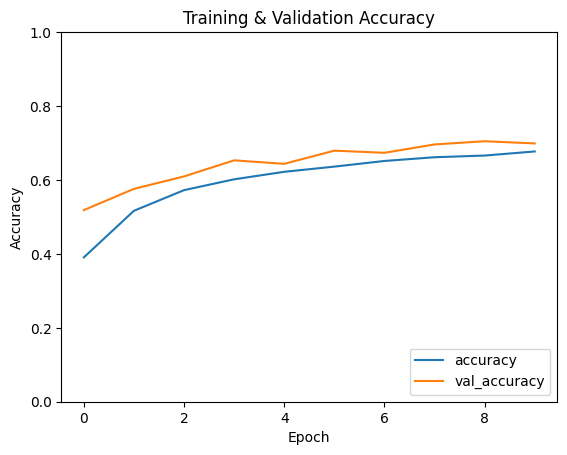

In [13]:
# 訓練與驗證準確率圖
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title("Training & Validation Accuracy")
plt.show()

In [ ]:
predictions = model.predict(x_test)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


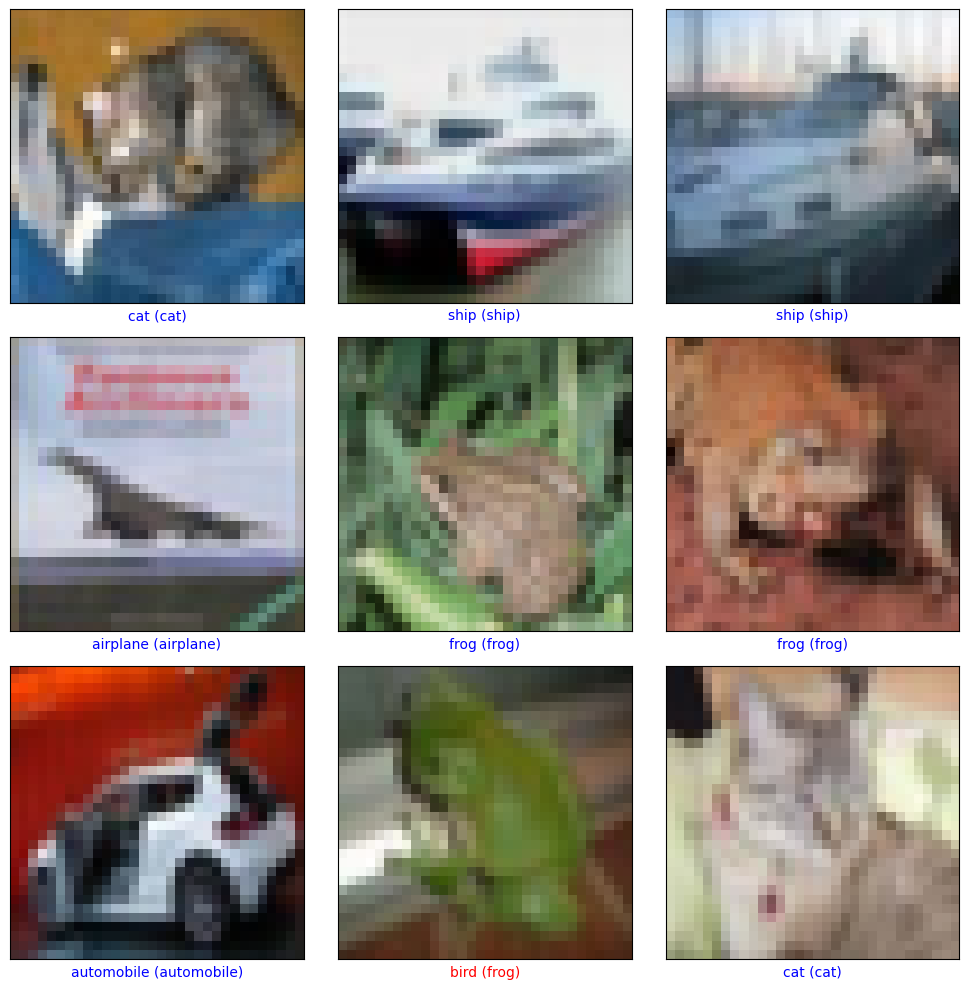

In [14]:
predictions = model.predict(x_test)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)
plt.tight_layout()
plt.show()

## Task 5: Report / Conclusion
本次實作主要透過卷積神經網路（CNN）進行 CIFAR-10 影像分類任務，並針對模型架構、超參數與資料增強進行調整。從訓練與驗證準確率曲線來看，模型有穩定學習效果，並在測試集上達到不錯的分類表現。

其中，資料增強提供更多樣化的輸入，有助於模型泛化能力，而 Adam Optimizer 也加快了收斂速度。視覺化預測結果發現，大多數圖片皆能準確分類，唯有部分物種相似的類別（如 cat 與 dog）仍易混淆。

本次作業讓我更加理解 CNN 模型的建構邏輯與調整技巧，也學會了如何透過實驗與視覺化分析模型表現。